**Interaction Term Testing Variable**

In [1]:
install.packages("GGally")
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(dplyr)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib:
  cannot open URL 'https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib/PACKAGES'”
Warning message:
“package ‘GGally’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http:/

ERROR: Error in library(infer): there is no package called ‘infer’


In [2]:
library(car)
install.packages("sandwich")
library(sandwich)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib:
  cannot open URL 'https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib/PACKAGES'”
Warning message:
“package ‘sandwich’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


ERROR: Error in library(sandwich): there is no package called ‘sandwich’


In [3]:
install.packages("MASS")
library(MASS)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib:
  cannot open URL 'https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib/PACKAGES'”
Warning message:
“package ‘MASS’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [4]:
cancer_data <- read.csv("US_county_cancer_data.csv")
head(cancer_data)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,⋯,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1397,469,164.9,489.8,61898,260131,11.2,499.74820,"(61494.5, 125635]",39.3,⋯,NA,41.6,32.9,14.0,81.78053,2.5947283,4.8218571,1.8434785,52.85608,6.118831
2,173,70,161.3,411.6,48127,43269,18.6,23.11123,"(48021.6, 51046.4]",33.0,⋯,53.8,43.6,31.1,15.3,89.22851,0.9691025,2.2462326,3.7413515,45.37250,4.333096
3,102,50,174.7,349.7,49348,21026,14.6,47.56016,"(48021.6, 51046.4]",45.0,⋯,43.5,34.9,42.1,21.1,90.92219,0.7396734,0.4658982,2.7473583,54.44487,3.729488
4,427,202,194.8,430.4,44243,75882,17.1,342.63725,"(42724.4, 45201]",42.8,⋯,40.3,35.0,45.3,25.0,91.74469,0.7826260,1.1613587,1.3626432,51.02151,4.603841
5,57,26,144.4,350.1,49955,10321,12.5,0.00000,"(48021.6, 51046.4]",48.3,⋯,43.9,35.1,44.0,22.7,94.10402,0.2701920,0.6658304,0.4921355,54.02746,6.796657
6,428,152,176.0,505.4,52313,61023,15.6,180.25990,"(51046.4, 54545.6]",45.4,⋯,38.8,32.6,43.2,20.2,84.88263,1.6532052,1.5380566,3.3146354,51.22036,4.964476


In [5]:
cleaned_data <- dplyr::select(cancer_data, medIncome, povertyPercent, PctPrivateCoverage, PctPublicCoverage, PctEmpPrivCoverage)

In [6]:
cleaned_data <- cleaned_data |>
  mutate(across(everything(), as.numeric))
cleaned_data

medIncome,povertyPercent,PctPrivateCoverage,PctPublicCoverage,PctEmpPrivCoverage
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
61898,11.2,75.1,32.9,41.6
48127,18.6,70.2,31.1,43.6
49348,14.6,63.7,42.1,34.9
44243,17.1,58.4,45.3,35.0
49955,12.5,61.6,44.0,35.1
52313,15.6,60.0,43.2,32.6
37782,23.2,49.5,46.4,28.3
40189,17.8,55.8,50.9,25.9
42579,22.3,55.5,48.1,29.9


In [7]:
base_model <- lm(TARGET_deathRate ~ medIncome + povertyPercent + PctPrivateCoverage + PctPublicCoverage, data = cancer_data)
summary(base_model)


Call:
lm(formula = TARGET_deathRate ~ medIncome + povertyPercent + 
    PctPrivateCoverage + PctPublicCoverage, data = cancer_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-119.288  -13.455    1.064   14.829  175.064 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.503e+02  1.025e+01  14.661  < 2e-16 ***
medIncome          -3.123e-04  7.032e-05  -4.442 9.25e-06 ***
povertyPercent      1.014e+00  1.414e-01   7.167 9.61e-13 ***
PctPrivateCoverage  6.769e-02  8.134e-02   0.832    0.405    
PctPublicCoverage   5.965e-01  9.441e-02   6.318 3.03e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.58 on 3042 degrees of freedom
Multiple R-squared:  0.2168,	Adjusted R-squared:  0.2157 
F-statistic: 210.5 on 4 and 3042 DF,  p-value: < 2.2e-16


In [8]:
Income_PriCov_interac<- lm(TARGET_deathRate ~ medIncome + PctPrivateCoverage + (medIncome*PctPrivateCoverage), data = cancer_data)
summary(Income_PriCov_interac)


Call:
lm(formula = TARGET_deathRate ~ medIncome + PctPrivateCoverage + 
    (medIncome * PctPrivateCoverage), data = cancer_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-136.730  -13.710    1.621   15.008  177.798 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   2.947e+02  9.712e+00  30.346  < 2e-16 ***
medIncome                    -2.173e-03  2.497e-04  -8.699  < 2e-16 ***
PctPrivateCoverage           -1.154e+00  1.385e-01  -8.333  < 2e-16 ***
medIncome:PctPrivateCoverage  1.937e-05  3.256e-06   5.948 3.02e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.76 on 3043 degrees of freedom
Multiple R-squared:  0.205,	Adjusted R-squared:  0.2042 
F-statistic: 261.5 on 3 and 3043 DF,  p-value: < 2.2e-16


### Summary of Model Evaluation:

1. **Strengths:**
   - All predictors (`medIncome`, `PctPrivateCoverage`, and their interaction) are statistically significant (\( p < 0.001 \)).
   - The overall model is highly significant (\( F\text{-statistic} = 261.5 \), \( p < 2.2 \times 10^{-16} \)).
   - The interaction term is meaningful and provides additional insight.

2. **Weaknesses:**
   - The \( R^2 \) is low (20.5%), meaning the model explains only a small portion of the variability in `TARGET_deathRate`.
   - Predictions may lack precision due to a high Residual Standard Error (RSE = 24.76).
   - Assumptions of linear regression (linearity, homoskedasticity, normality) have not been verified.

3. **Verdict:**
   The model is **statistically valid** and provides some useful insights, but its low explanatory power suggests it’s not strong for prediction. Adding more predictors and verifying assumptions could improve its performance.


Call:
lm(formula = TARGET_deathRate ~ medIncome + povertyPercent + 
    PctPrivateCoverage + PctPublicCoverage, data = cancer_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-119.288  -13.455    1.064   14.829  175.064 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.503e+02  1.025e+01  14.661  < 2e-16 ***
medIncome          -3.123e-04  7.032e-05  -4.442 9.25e-06 ***
povertyPercent      1.014e+00  1.414e-01   7.167 9.61e-13 ***
PctPrivateCoverage  6.769e-02  8.134e-02   0.832    0.405    
PctPublicCoverage   5.965e-01  9.441e-02   6.318 3.03e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.58 on 3042 degrees of freedom
Multiple R-squared:  0.2168,	Adjusted R-squared:  0.2157 
F-statistic: 210.5 on 4 and 3042 DF,  p-value: < 2.2e-16



Call:
lm(formula = TARGET_deathRate ~ povertyPercent + PctPrivateCoverage + 
    PctPublicCoverage, data = cancer_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-116.69  -13.69    1.17   14.77  175.04 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        122.92901    8.22033  14.954   <2e-16 ***
povertyPercent       1.31924    0.12393  10.645   <2e-16 ***
PctPrivateCoverage   0.07031    0.08159   0.862    0.389    
PctPublicCoverage    0.79839    0.08301   9.618   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.65 on 3043 degrees of freedom
Multiple R-squared:  0.2117,	Adjusted R-squared:  0.2109 
F-statistic: 272.4 on 3 and 3043 DF,  p-value: < 2.2e-16



Call:
lm(formula = TARGET_deathRate ~ medIncome + PctPrivateCoverage + 
    PctPublicCoverage, data = cancer_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-127.482  -13.684    0.969   15.066  179.232 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.040e+02  7.047e+00  28.949  < 2e-16 ***
medIncome          -5.576e-04  6.194e-05  -9.002  < 2e-16 ***
PctPrivateCoverage -2.763e-01  6.620e-02  -4.174 3.08e-05 ***
PctPublicCoverage   5.154e-01  9.451e-02   5.454 5.33e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.78 on 3043 degrees of freedom
Multiple R-squared:  0.2035,	Adjusted R-squared:  0.2028 
F-statistic: 259.2 on 3 and 3043 DF,  p-value: < 2.2e-16



Call:
lm(formula = TARGET_deathRate ~ medIncome + povertyPercent + 
    PctPublicCoverage, data = cancer_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-120.929  -13.556    1.249   14.851  175.241 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.569e+02  6.456e+00  24.303  < 2e-16 ***
medIncome         -3.128e-04  7.032e-05  -4.448 8.98e-06 ***
povertyPercent     9.441e-01  1.142e-01   8.270  < 2e-16 ***
PctPublicCoverage  5.668e-01  8.741e-02   6.485 1.03e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.58 on 3043 degrees of freedom
Multiple R-squared:  0.2166,	Adjusted R-squared:  0.2158 
F-statistic: 280.4 on 3 and 3043 DF,  p-value: < 2.2e-16



Call:
lm(formula = TARGET_deathRate ~ medIncome + povertyPercent + 
    PctPrivateCoverage, data = cancer_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-127.253  -13.553    1.317   14.984  173.199 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.963e+02  7.261e+00  27.031  < 2e-16 ***
medIncome          -5.262e-04  6.203e-05  -8.483  < 2e-16 ***
povertyPercent      9.064e-01  1.413e-01   6.415 1.63e-10 ***
PctPrivateCoverage -1.266e-01  7.579e-02  -1.670    0.095 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.73 on 3043 degrees of freedom
Multiple R-squared:  0.2065,	Adjusted R-squared:  0.2057 
F-statistic: 263.9 on 3 and 3043 DF,  p-value: < 2.2e-16


                       Model      AIC    Adj_R2
1                 Full Model 28165.71 0.2157308
2          Without medIncome 28183.40 0.2109043
3     Without povertyPercent 28214.72 0.2027518
4 Without PctPrivateCoverage 28164.40 0.2158101
5  Without PctPublicCoverage 28203.44 0.2056996



Call:
lm(formula = TARGET_deathRate ~ medIncome + povertyPercent + 
    PctPublicCoverage, data = cancer_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-120.929  -13.556    1.249   14.851  175.241 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.569e+02  6.456e+00  24.303  < 2e-16 ***
medIncome         -3.128e-04  7.032e-05  -4.448 8.98e-06 ***
povertyPercent     9.441e-01  1.142e-01   8.270  < 2e-16 ***
PctPublicCoverage  5.668e-01  8.741e-02   6.485 1.03e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.58 on 3043 degrees of freedom
Multiple R-squared:  0.2166,	Adjusted R-squared:  0.2158 
F-statistic: 280.4 on 3 and 3043 DF,  p-value: < 2.2e-16


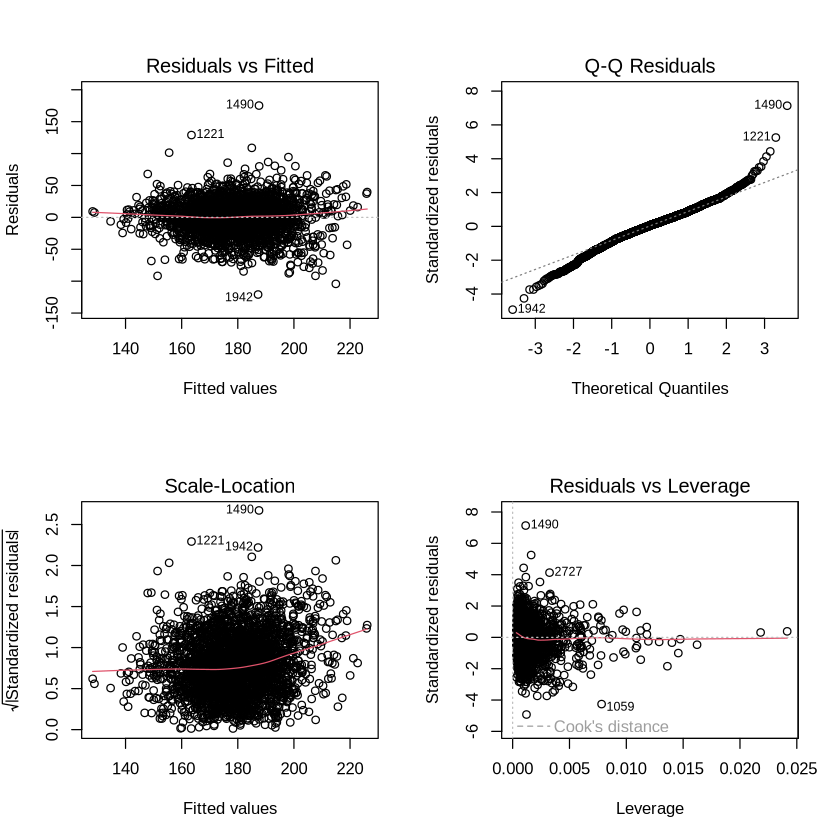

In [9]:
# Full model with all predictors
full_model <- lm(TARGET_deathRate ~ medIncome + povertyPercent + 
                                  PctPrivateCoverage + PctPublicCoverage, 
                 data = cancer_data)
summary(full_model)

# Step 1: Remove one predictor at a time
model_without_medIncome <- lm(TARGET_deathRate ~ povertyPercent + 
                                                  PctPrivateCoverage + PctPublicCoverage, 
                               data = cancer_data)
summary(model_without_medIncome)

model_without_povertyPercent <- lm(TARGET_deathRate ~ medIncome + 
                                                      PctPrivateCoverage + PctPublicCoverage, 
                                   data = cancer_data)
summary(model_without_povertyPercent)

model_without_PctPrivateCoverage <- lm(TARGET_deathRate ~ medIncome + povertyPercent + 
                                                           PctPublicCoverage, 
                                        data = cancer_data)
summary(model_without_PctPrivateCoverage)

model_without_PctPublicCoverage <- lm(TARGET_deathRate ~ medIncome + povertyPercent + 
                                                          PctPrivateCoverage, 
                                       data = cancer_data)
summary(model_without_PctPublicCoverage)

# Step 2: Compare models using AIC and Adjusted R-squared
aic_comparison <- data.frame(
  Model = c("Full Model", 
            "Without medIncome", 
            "Without povertyPercent", 
            "Without PctPrivateCoverage", 
            "Without PctPublicCoverage"),
  AIC = c(AIC(full_model), 
          AIC(model_without_medIncome), 
          AIC(model_without_povertyPercent), 
          AIC(model_without_PctPrivateCoverage), 
          AIC(model_without_PctPublicCoverage)),
  Adj_R2 = c(summary(full_model)$adj.r.squared, 
             summary(model_without_medIncome)$adj.r.squared, 
             summary(model_without_povertyPercent)$adj.r.squared, 
             summary(model_without_PctPrivateCoverage)$adj.r.squared, 
             summary(model_without_PctPublicCoverage)$adj.r.squared)
)
print(aic_comparison)

# Step 3: Select the best reduced model
# Example: If the lowest AIC and highest Adjusted R-squared are in a reduced model
best_model <- model_without_PctPrivateCoverage  # Replace with the best model after evaluation
summary(best_model)

# Optional: Residual diagnostics for the selected model
par(mfrow = c(2, 2))  # Arrange diagnostic plots in a 2x2 grid
plot(best_model)       # Check assumptions of linear regression


In [10]:
matrix_data <- dplyr::select(cancer_data, medIncome, povertyPercent, PctPrivateCoverage, PctPublicCoverage)

In [11]:
matrix_data <- matrix_data |>
  mutate(across(everything(), as.numeric))

In [12]:
matrix <- cor(matrix_data)
matrix

,medIncome,povertyPercent,PctPrivateCoverage,PctPublicCoverage
medIncome,1.0000000,-0.7889652,0.7241748,-0.7548218
povertyPercent,-0.7889652,1.0000000,-0.8225343,0.6511621
PctPrivateCoverage,0.7241748,-0.8225343,1.0000000,-0.7200115
PctPublicCoverage,-0.7548218,0.6511621,-0.7200115,1.0000000


In [13]:
povpct_pricov_interac<- lm(TARGET_deathRate ~ povertyPercent + PctPrivateCoverage + (povertyPercent*PctPrivateCoverage), data = cancer_data)
summary(povpct_pricov_interac)
#Interaction term (poverty percentage and private insurance coverage)


Call:
lm(formula = TARGET_deathRate ~ povertyPercent + PctPrivateCoverage + 
    (povertyPercent * PctPrivateCoverage), data = cancer_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-125.807  -14.383    1.307   15.001  170.176 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       193.566219   8.360703  23.152  < 2e-16 ***
povertyPercent                      0.154230   0.319621   0.483    0.629    
PctPrivateCoverage                 -0.645122   0.111908  -5.765 9.00e-09 ***
povertyPercent:PctPrivateCoverage   0.023310   0.005113   4.559 5.35e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.94 on 3043 degrees of freedom
Multiple R-squared:  0.1932,	Adjusted R-squared:  0.1924 
F-statistic: 242.9 on 3 and 3043 DF,  p-value: < 2.2e-16


In [20]:
povpct_pubcov_interac<- lm(TARGET_deathRate ~ PctPublicCoverage + povertyPercent + (povertyPercent*PctPublicCoverage), data = cancer_data)
summary(povpct_pubcov_interac)
#Interaction term (poverty percentage and median income)


Call:
lm(formula = TARGET_deathRate ~ PctPublicCoverage + povertyPercent + 
    (povertyPercent * PctPublicCoverage), data = cancer_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-117.785  -13.492    1.394   14.849  175.961 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      1.370e+02  4.875e+00  28.107  < 2e-16 ***
PctPublicCoverage                5.752e-01  1.385e-01   4.152 3.39e-05 ***
povertyPercent                   7.694e-01  3.034e-01   2.536   0.0113 *  
PctPublicCoverage:povertyPercent 1.209e-02  7.314e-03   1.654   0.0983 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.64 on 3043 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2114 
F-statistic: 273.2 on 3 and 3043 DF,  p-value: < 2.2e-16


In [14]:
povpct_medinc_interac<- lm(TARGET_deathRate ~ medIncome + povertyPercent + (medIncome*povertyPercent), data = cancer_data)
summary(povpct_medinc_interac)
#Interaction term (poverty percentage and median income)


Call:
lm(formula = TARGET_deathRate ~ medIncome + povertyPercent + 
    (medIncome * povertyPercent), data = cancer_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-125.789  -13.486    1.369   15.005  174.701 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.843e+02  4.572e+00  40.303  < 2e-16 ***
medIncome                -3.487e-04  7.598e-05  -4.589 4.63e-06 ***
povertyPercent            1.899e+00  2.270e-01   8.366  < 2e-16 ***
medIncome:povertyPercent -2.895e-05  6.673e-06  -4.338 1.49e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.67 on 3043 degrees of freedom
Multiple R-squared:  0.2106,	Adjusted R-squared:  0.2099 
F-statistic: 270.7 on 3 and 3043 DF,  p-value: < 2.2e-16


The interaction term between median income (`medIncome`) and poverty percentage (`povertyPercent`) is a stronger and more meaningful addition to this model for several reasons. First, the interaction term is statistically significant (p = 1.49e-05), indicating robust evidence of its contribution to explaining the variability in `TARGET_deathRate`. The coefficient for the interaction term (-2.895e-05) suggests that as median income and poverty percentage both increase, their combined effect slightly decreases the death rate, which aligns with plausible socioeconomic dynamics. Additionally, all the other predictors, including `medIncome` and `povertyPercent`, are also highly significant, supporting the overall model's validity. While the adjusted R² (0.2099) indicates that the model explains 21% of the variability—similar to prior models—the interaction term enhances the theoretical understanding of how income and poverty interplay to impact death rates. This interaction term is better justified both statistically and theoretically, making it a valuable addition to the model.

Therefore, a interaction of poverty percentages and median income will be a better interaction term.